# UCI Credit Card Default Dataset to demonstrate:
- Supervised Learning (Classification & Regression)
- Unsupervised Learning (Clustering)
- Anomaly Detection
- Dimensionality Reduction (PCA)
- Model Evaluation

## 1. Load and Prepare the Data

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00350/default%20of%20credit%20card%20clients.xls"
df = pd.read_excel(url, header=1)
df.rename(columns={'default payment next month': 'default'}, inplace=True)
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'default'],
      dtype='object')

About **UCI Credit Card Default Dataset**:

1. **ID**: Client's unique identifier (drop for analysis).
2. **LIMIT\_BAL**: Credit limit (in New Taiwan Dollars).
3. **SEX**: Gender (1 = Male, 2 = Female).
4. **EDUCATION**: Education level (1 = Graduate, 2 = University, 3 = High School, 4 = Other).
5. **MARRIAGE**: Marital status (1 = Married, 2 = Single, 3 = Other).
6. **AGE**: Client's age.
7. **PAY\_0 to PAY\_6**: Payment status for the last 6 months (0 = No consumption, 1-6 = Payment delay).
8. **BILL\_AMT1 to BILL\_AMT6**: Bill amounts for the last 6 months (in New Taiwan Dollars).
9. **PAY\_AMT1 to PAY\_AMT6**: Payments made in the last 6 months (in New Taiwan Dollars).
10. **DEFAULT**: Default status next month (1 = Default, 0 = No default).

These variables are used to predict whether a client will default on their payment.


In [ ]:
# 2. Exploratory Data Analysis (EDA)import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Display basic info
print(df.shape)
print(df.info())

(30000, 25)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   ID         30000 non-null  int64
 1   LIMIT_BAL  30000 non-null  int64
 2   SEX        30000 non-null  int64
 3   EDUCATION  30000 non-null  int64
 4   MARRIAGE   30000 non-null  int64
 5   AGE        30000 non-null  int64
 6   PAY_0      30000 non-null  int64
 7   PAY_2      30000 non-null  int64
 8   PAY_3      30000 non-null  int64
 9   PAY_4      30000 non-null  int64
 10  PAY_5      30000 non-null  int64
 11  PAY_6      30000 non-null  int64
 12  BILL_AMT1  30000 non-null  int64
 13  BILL_AMT2  30000 non-null  int64
 14  BILL_AMT3  30000 non-null  int64
 15  BILL_AMT4  30000 non-null  int64
 16  BILL_AMT5  30000 non-null  int64
 17  BILL_AMT6  30000 non-null  int64
 18  PAY_AMT1   30000 non-null  int64
 19  PAY_AMT2   30000 non-null  int64
 20  PAY_AMT3   30000 non-null  int64
 21  

In [ ]:
print(df.describe())

                 ID       LIMIT_BAL           SEX     EDUCATION      MARRIAGE  \
count  30000.000000    30000.000000  30000.000000  30000.000000  30000.000000   
mean   15000.500000   167484.322667      1.603733      1.853133      1.551867   
std     8660.398374   129747.661567      0.489129      0.790349      0.521970   
min        1.000000    10000.000000      1.000000      0.000000      0.000000   
25%     7500.750000    50000.000000      1.000000      1.000000      1.000000   
50%    15000.500000   140000.000000      2.000000      2.000000      2.000000   
75%    22500.250000   240000.000000      2.000000      2.000000      2.000000   
max    30000.000000  1000000.000000      2.000000      6.000000      3.000000   

                AGE         PAY_0         PAY_2         PAY_3         PAY_4  \
count  30000.000000  30000.000000  30000.000000  30000.000000  30000.000000   
mean      35.485500     -0.016700     -0.133767     -0.166200     -0.220667   
std        9.217904      1.123802

          ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  \
0          1      20000    2          2         1   24      2      2     -1   
1          2     120000    2          2         2   26     -1      2      0   
2          3      90000    2          2         2   34      0      0      0   
3          4      50000    2          2         1   37      0      0      0   
4          5      50000    1          2         1   57     -1      0     -1   
...      ...        ...  ...        ...       ...  ...    ...    ...    ...   
29995  29996     220000    1          3         1   39      0      0      0   
29996  29997     150000    1          3         2   43     -1     -1     -1   
29997  29998      30000    1          2         2   37      4      3      2   
29998  29999      80000    1          3         1   41      1     -1      0   
29999  30000      50000    1          2         1   46      0      0      0   

       PAY_4  ...  BILL_AMT4  BILL_AMT5  BILL_AMT6 

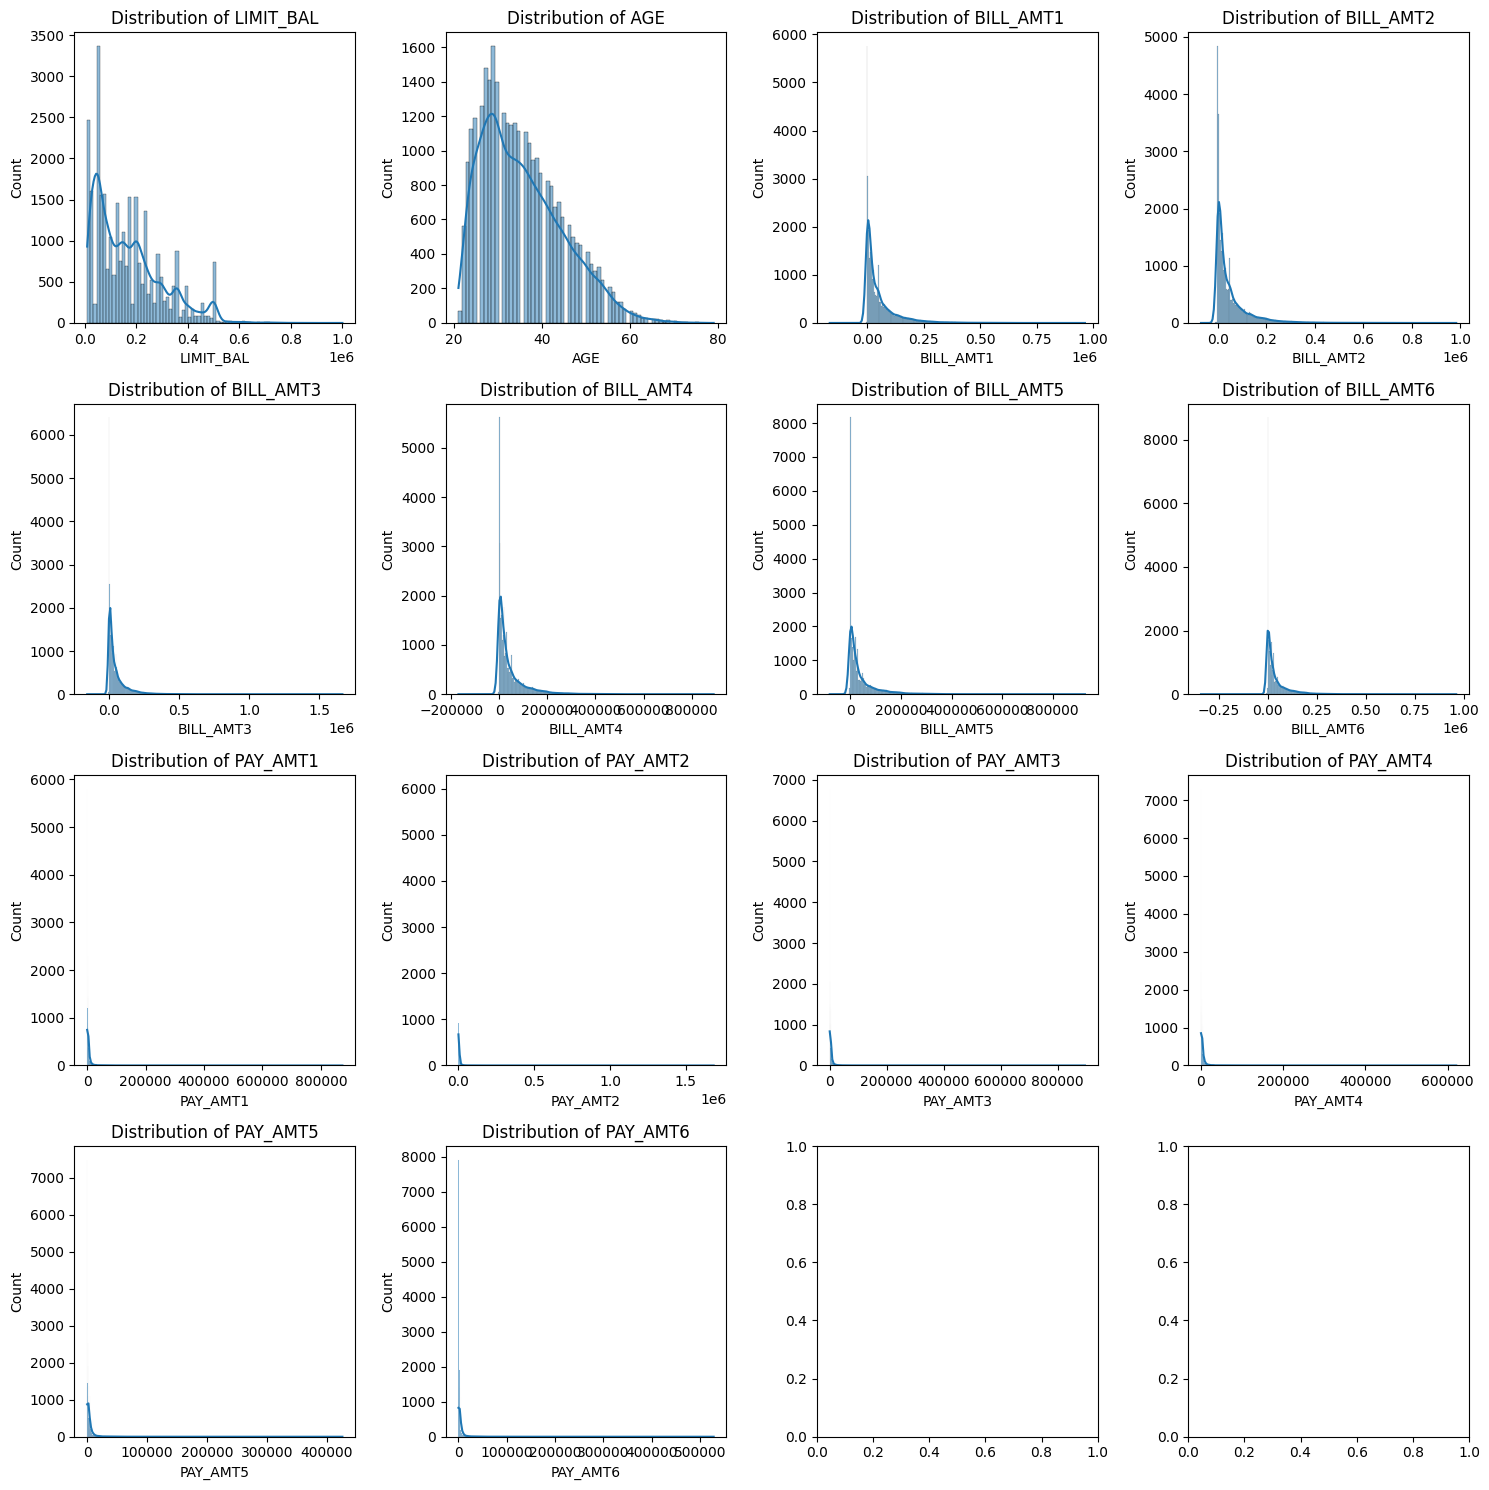

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import math
print(df)

# Define numerical features for the credit card dataset
numerical_features = ['LIMIT_BAL', 'AGE', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',
                      'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']

# Create subplot grid
fig, axes = plt.subplots(math.ceil(len(numerical_features) / 4), 4, figsize=(15, 5*3))
for i, col in enumerate(numerical_features):
    sns.histplot(df[col], kde=True, ax=axes[i // 4, i % 4])
    axes[i // 4, i % 4].set_title(f'Distribution of {col}')

# # Hide unused subplots
# for i in range(len(numerical_features), len(axes.flat)):
#     axes.flat[i].axis('off')

plt.tight_layout()
plt.show()

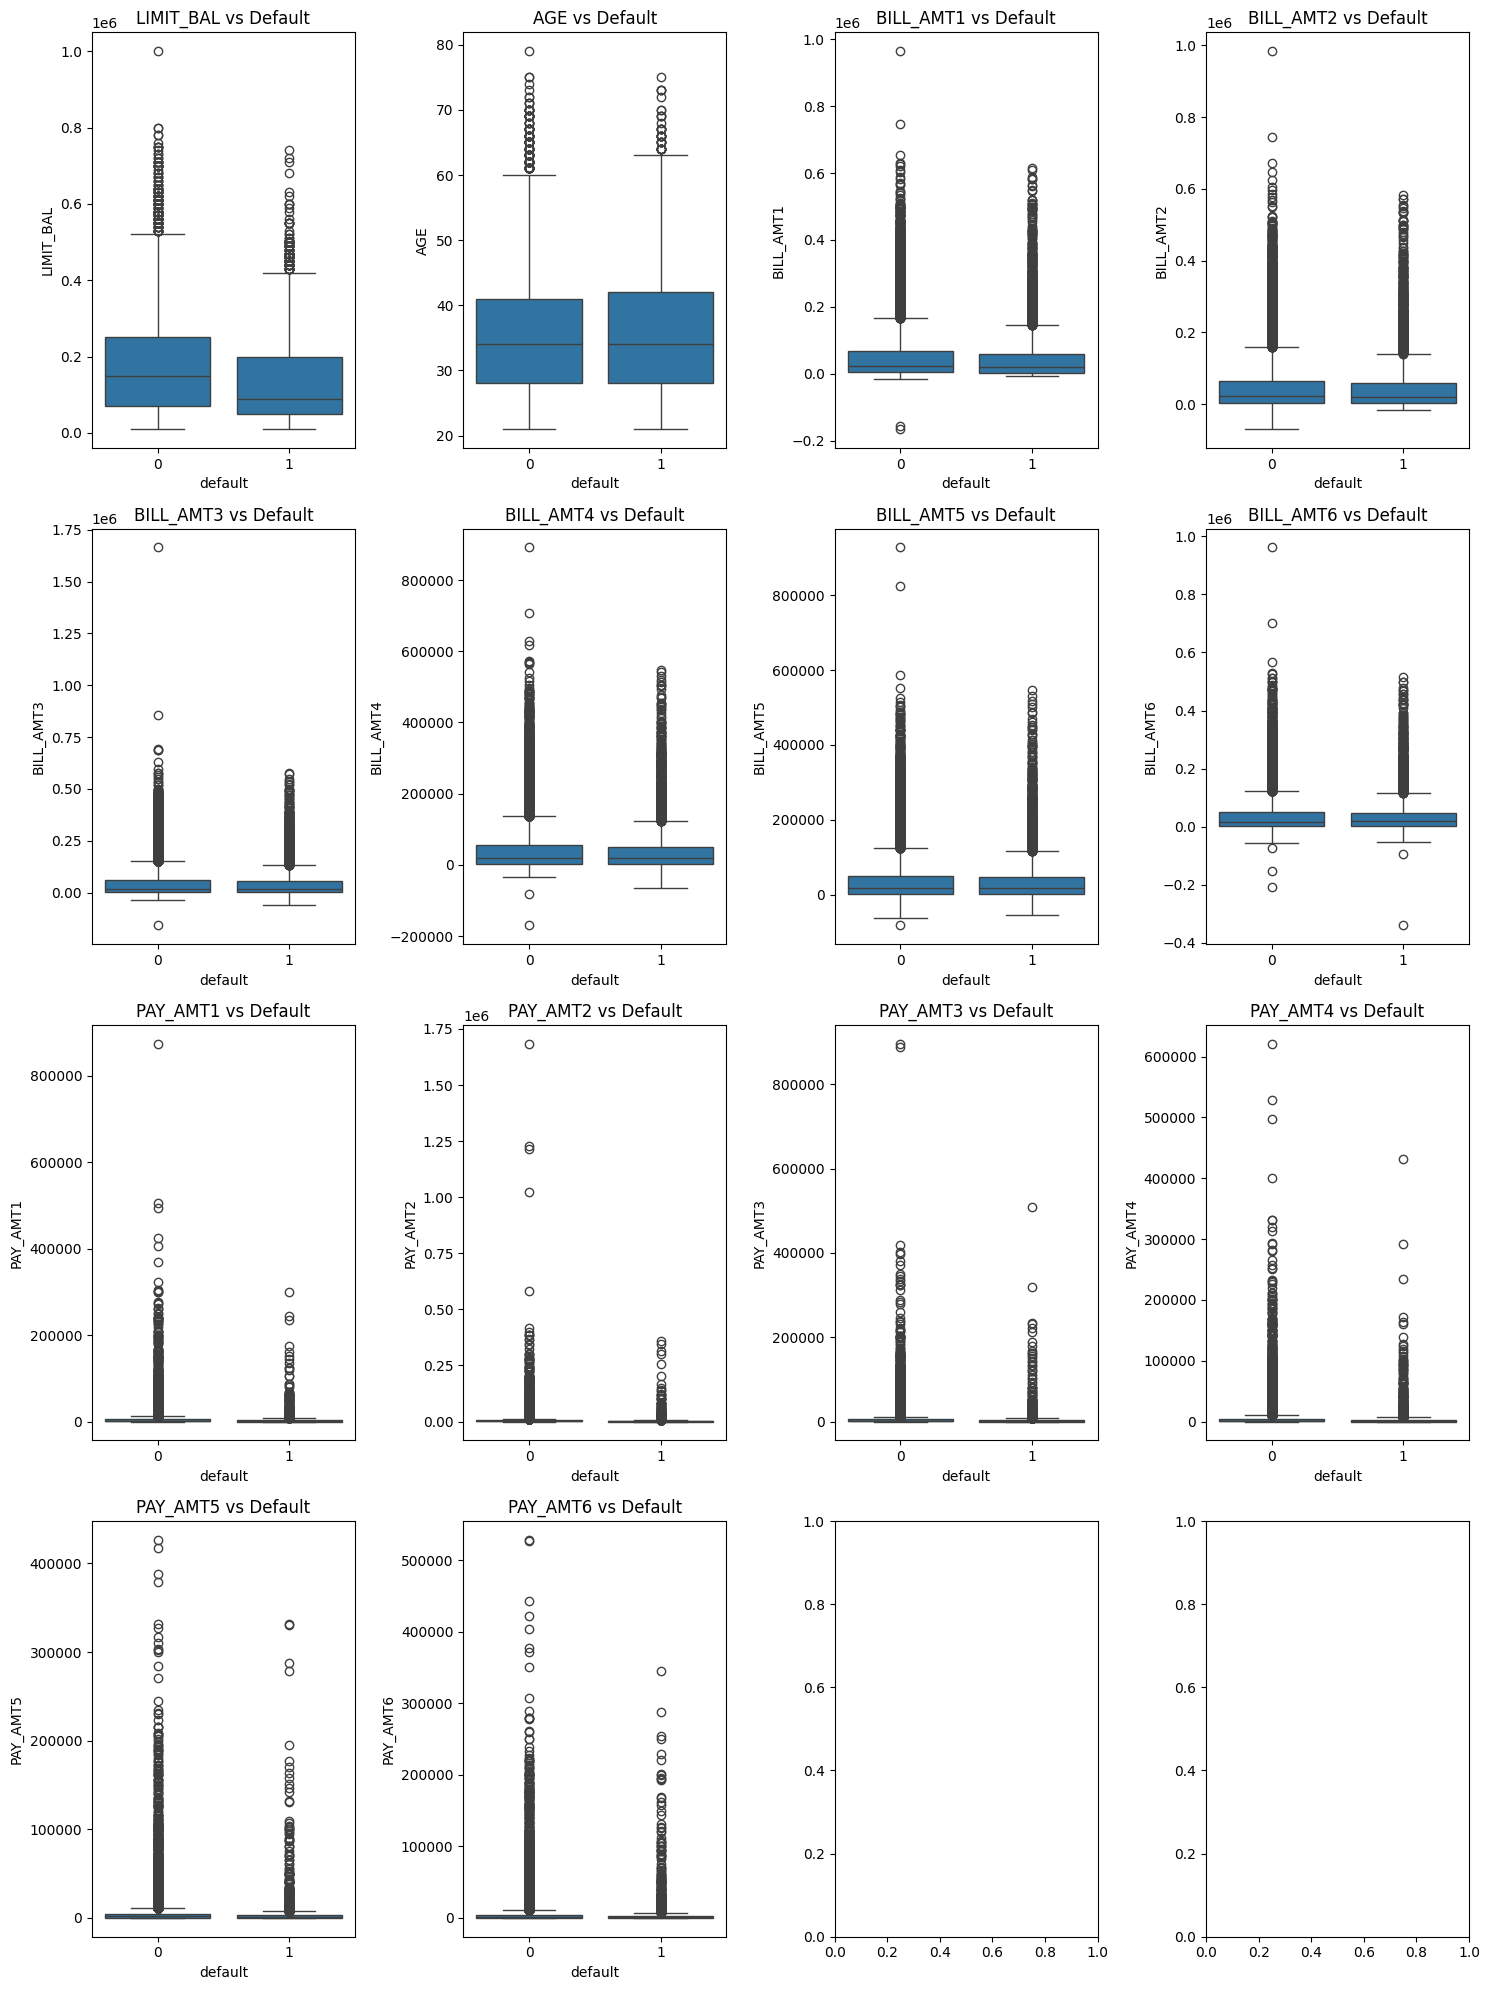

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import math

# Assuming 'df' and 'numerical_features' are defined
n = len(numerical_features)
n_cols = 4
n_rows = math.ceil(n / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))
for i, col in enumerate(numerical_features):
    ax = axes[i // n_cols, i % n_cols]
    sns.boxplot(x='default', y=col, data=df, ax=ax)
    ax.set_title(f'{col} vs Default')

# # Hide empty subplots
# for j in range(n, n_rows * n_cols):
#     axes[j // n_cols, j % n_cols].axis('off')

plt.tight_layout()
plt.show()


# Explore categorical features (if any) -  This dataset doesn't have explicit categorical columns
# but you might have them in other datasets
# categorical_features = X.select_dtypes(include=['object', 'category']).columns
# for col in categorical_features:
#    plt.figure(figsize=(8, 6))
#    sns.countplot(x=col, hue='default', data=df)
#    plt.title(f'Relationship between {col} and Default')
#    plt.show()



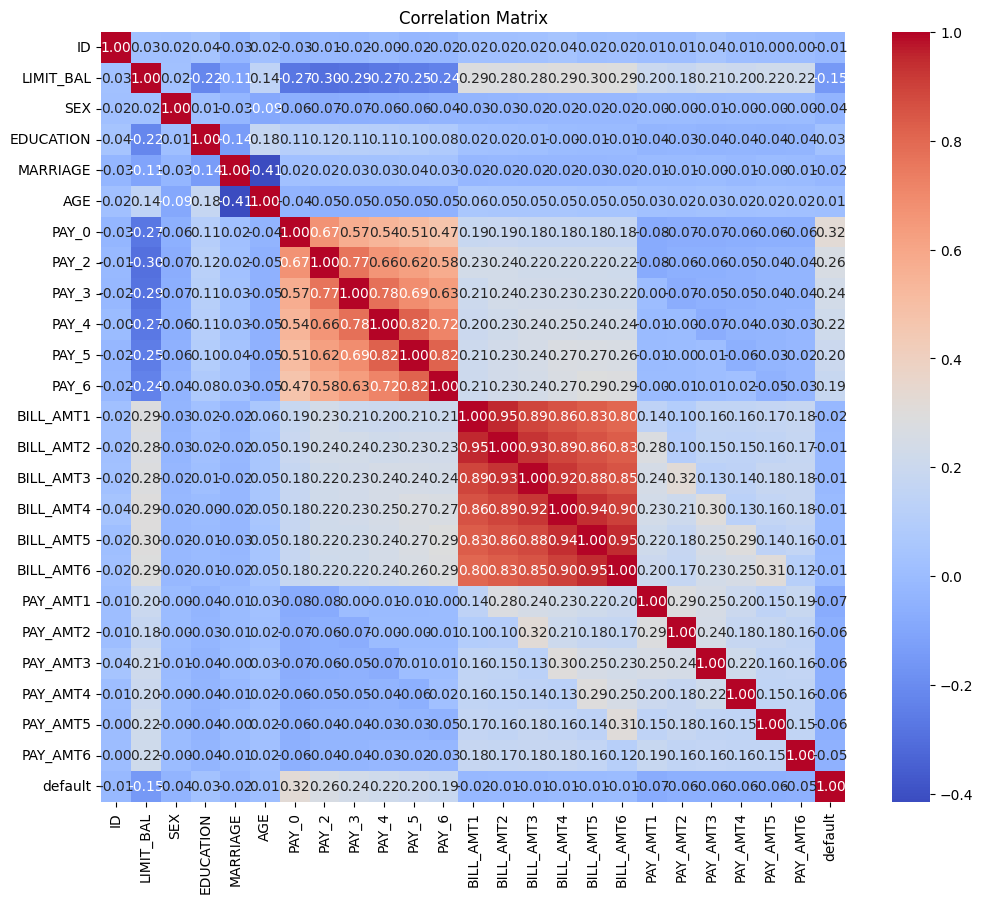

In [ ]:
# Correlation matrix
correlation_matrix = df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [ ]:
# Drop ID column
df.drop(columns=['ID'], inplace=True)

# Feature-target split
X = df.drop(columns='default')
y = df['default']

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

KeyError: "['ID'] not found in axis"

# Supervised Learning (Classification & Regression)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

clf = LogisticRegression(max_iter=1000)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[90 16]
 [17 56]]
              precision    recall  f1-score   support

           0       0.84      0.85      0.85       106
           1       0.78      0.77      0.77        73

    accuracy                           0.82       179
   macro avg       0.81      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179



In [ ]:
from sklearn.metrics import (
    confusion_matrix, accuracy_score, balanced_accuracy_score,
    precision_score, recall_score, f1_score, roc_auc_score,
    roc_curve, log_loss, matthews_corrcoef, cohen_kappa_score
)

# Predict probabilities if you need ROC-AUC or log-loss
y_prob = clf.predict_proba(X_test)[:, 1]

# Confusion matrix
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

# Basic metrics
acc  = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec  = recall_score(y_test, y_pred)
f1   = f1_score(y_test, y_pred)

# Threshold-independent metrics
roc_auc = roc_auc_score(y_test, y_prob)

# Sensitivity & Specificity
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)

# Print them all
print(f"Accuracy:            {acc:.3f}")
print(f"Precision:           {prec:.3f}")
print(f"Recall (Sensitivity):{rec:.3f}")
print(f"Specificity:         {specificity:.3f}")
print(f"F1 Score:            {f1:.3f}")
print(f"ROC AUC:             {roc_auc:.3f}")


Accuracy:            0.816
Precision:           0.778
Recall (Sensitivity):0.767
Specificity:         0.849
F1 Score:            0.772
ROC AUC:             0.873


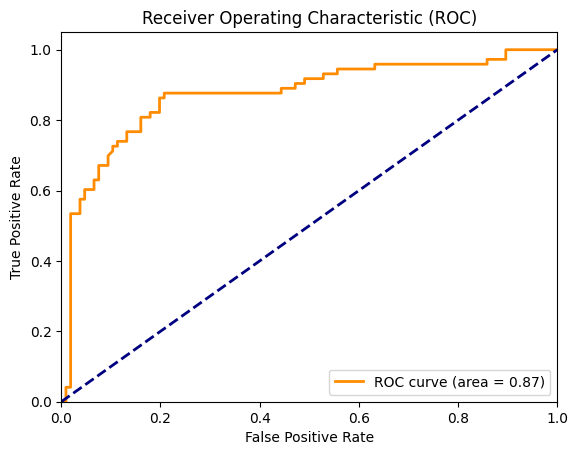

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Assuming you have y_test and y_pred_prob (probability estimates)
# If you only have y_pred (class labels), you need to get probabilities first
y_pred_prob = clf.predict_proba(X_test)[:, 1]  # Probability of positive class

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()


**Summary and Implications:**

The model performs well on class '0' but struggles significantly with class '1'. The low recall for class '1' is a major concern. This suggests the model is biased towards predicting class '0', likely because it is the more prevalent class in the dataset (class imbalance). The accuracy is high (0.81), but this is misleading because it is heavily influenced by the good performance on the majority class. The weighted average F1-score is a better indicator of overall performance than the macro average, as it accounts for the class imbalance. However, the low recall for class '1' is still a problem that needs to be addressed.

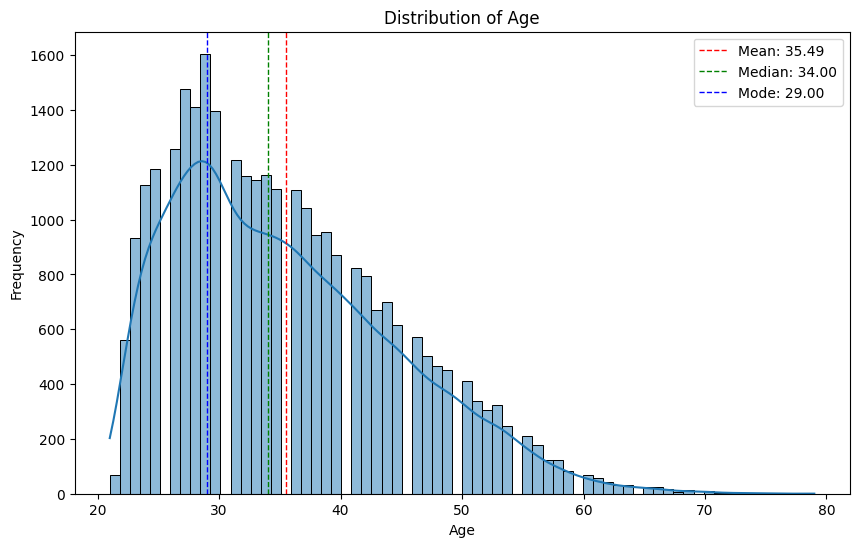

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is your DataFrame and 'AGE' is the age column
plt.figure(figsize=(10, 6))
sns.histplot(df['AGE'], kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')

# Calculate mean, median, and mode
mean_age = df['AGE'].mean()
median_age = df['AGE'].median()
mode_age = df['AGE'].mode()[0]  # Access the first element if there are multiple modes

# Add vertical lines for mean, median, and mode
plt.axvline(mean_age, color='red', linestyle='dashed', linewidth=1, label=f'Mean: {mean_age:.2f}')
plt.axvline(median_age, color='green', linestyle='dashed', linewidth=1, label=f'Median: {median_age:.2f}')
plt.axvline(mode_age, color='blue', linestyle='dashed', linewidth=1, label=f'Mode: {mode_age:.2f}')

plt.legend()
plt.show()


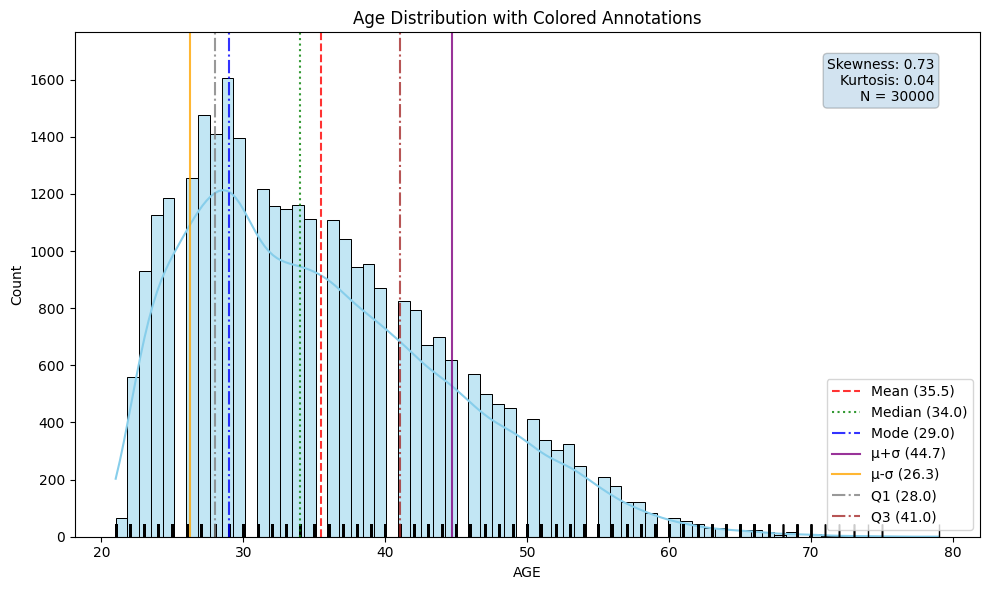

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Assuming `ages` is your Series: ages = df['AGE']
ages = df['AGE']

# Compute stats
mean = ages.mean()
median = ages.median()
mode = ages.mode()[0]
std = ages.std()
q1, q3 = ages.quantile([0.25, 0.75])
skew = ages.skew()
kurt = ages.kurtosis()
n = len(ages)

# Define colors
hist_color = 'skyblue'
rug_color  = 'black'
line_colors = ['red','green','blue','purple','orange','gray','brown']

# Plot
fig, ax = plt.subplots(figsize=(10, 6))
sns.histplot(ages, kde=True, color=hist_color, ax=ax)
sns.rugplot(ages, color=rug_color, ax=ax)

# Vertical lines with distinct colors
for val, style, label, col in zip(
    [mean, median, mode, mean+std, mean-std, q1, q3],
    ['--', ':', '-.', '-', '-', '-.', '-.'],
    ['Mean','Median','Mode','μ+σ','μ-σ','Q1','Q3'],
    line_colors
):
    ax.axvline(val, linestyle=style, color=col, alpha=0.8,
               label=f'{label} ({val:.1f})')

# Annotation box
text = f"Skewness: {skew:.2f}\nKurtosis: {kurt:.2f}\nN = {n}"
ax.text(0.95, 0.95, text, transform=ax.transAxes,
        ha='right', va='top', bbox=dict(boxstyle='round', alpha=0.2))

ax.set_title("Age Distribution with Colored Annotations")
ax.legend()
plt.tight_layout()
plt.show()



# Linear Regression (Bill Amount prediction)

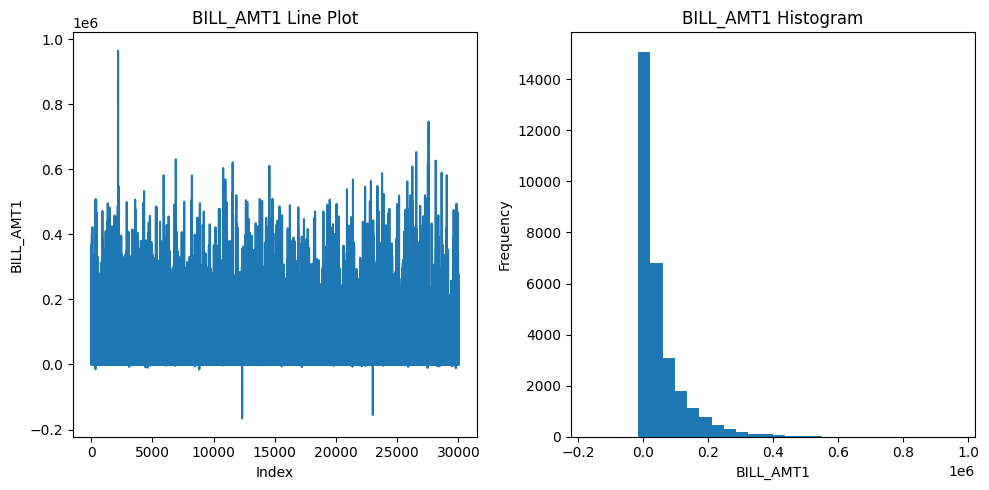

In [ ]:
import matplotlib.pyplot as plt
# Assuming 'df' is your DataFrame and 'BILL_AMT1' is the column you want to plot
plt.figure(figsize=(10, 5))

# Line plot
plt.subplot(1, 2, 1)
plt.plot(df['BILL_AMT1'])
plt.title('BILL_AMT1 Line Plot')
plt.xlabel('Index')
plt.ylabel('BILL_AMT1')


# Histogram
plt.subplot(1, 2, 2)
plt.hist(df['BILL_AMT1'], bins=30)  # Adjust bins as needed
plt.title('BILL_AMT1 Histogram')
plt.xlabel('BILL_AMT1')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


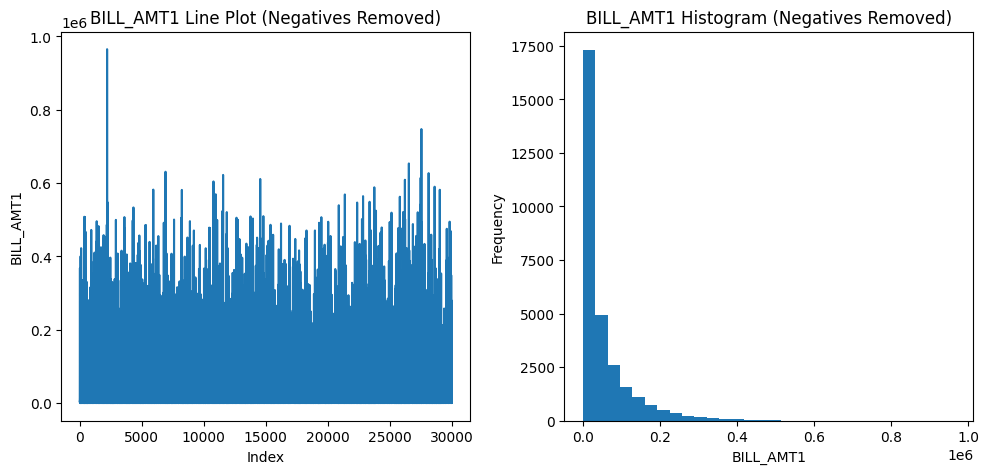

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

# ... (Your existing code for loading and preprocessing data)

# Assuming 'df' is your DataFrame and you want to remove negative values from 'BILL_AMT1'
df['BILL_AMT1'] = df['BILL_AMT1'].apply(lambda x: x if x >= 0 else 0)

# Plotting the modified 'BILL_AMT1'
plt.figure(figsize=(10, 5))

# Line plot
plt.subplot(1, 2, 1)
plt.plot(df['BILL_AMT1'])
plt.title('BILL_AMT1 Line Plot (Negatives Removed)')
plt.xlabel('Index')
plt.ylabel('BILL_AMT1')

# Histogram
plt.subplot(1, 2, 2)
plt.hist(df['BILL_AMT1'], bins=30)  # Adjust bins as needed
plt.title('BILL_AMT1 Histogram (Negatives Removed)')
plt.xlabel('BILL_AMT1')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


In [ ]:
from sklearn.linear_model import LinearRegression

# Example: Predict next month's bill amount (BILL_AMT1)
target = 'BILL_AMT1'
X_reg = df.drop(columns=[target])
y_reg = df[target]

Xr_train, Xr_test, yr_train, yr_test = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

reg = LinearRegression()
reg.fit(Xr_train, yr_train)
print("R²:", reg.score(Xr_test, yr_test))


R²: 0.9285905273557964


# 3. Unsupervised Learning (Clustering)

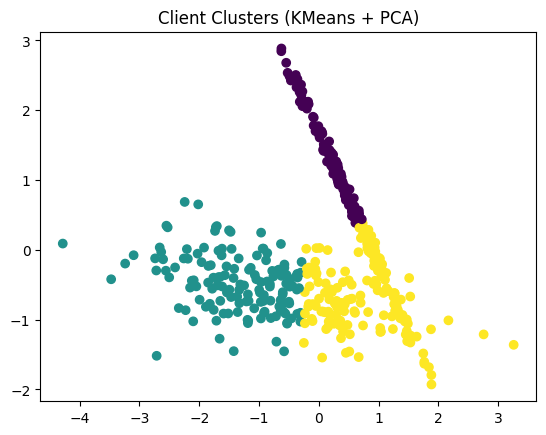

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Visualize with PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis')
plt.title("Client Clusters (KMeans + PCA)")
plt.show()


# 5. Dimensionality Reduction (PCA)

In [ ]:
pca_full = PCA(n_components=2)
X_pca_full = pca_full.fit_transform(X_scaled)

print("Explained variance ratio:", pca_full.explained_variance_ratio_)


Explained variance ratio: [0.55806869 0.44193131]


# 6. Model Evaluation

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, clf.predict_proba(X_test)[:,1]))


Accuracy: 0.8156424581005587
Precision: 0.7777777777777778
Recall: 0.7671232876712328
ROC AUC: 0.872899974153528


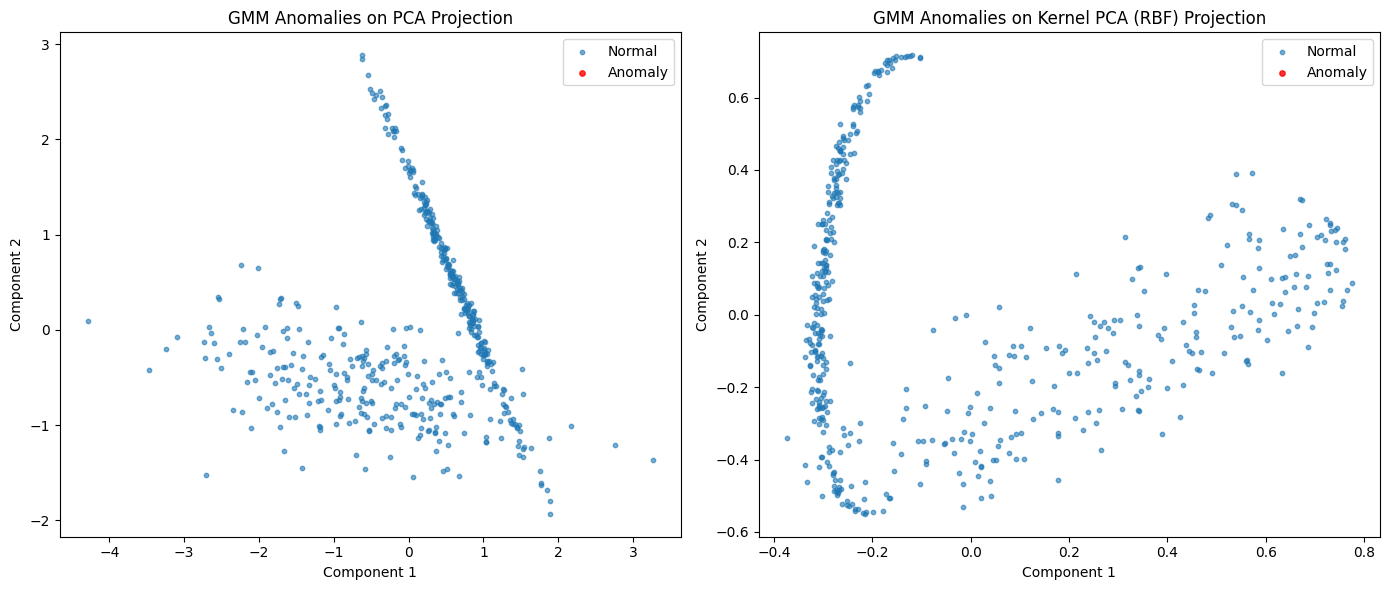

In [ ]:
from sklearn.decomposition import PCA, KernelPCA
#  GMM for anomaly scores
gmm = GaussianMixture(n_components=2, random_state=42)
gmm.fit(X_scaled)
probs = gmm.predict_proba(X_scaled)
outlier_scores = np.min(probs, axis=1)
threshold = np.percentile(outlier_scores, 5)
outliers = outlier_scores < threshold

#  PCA & Kernel PCA
X_pca  = PCA(n_components=2, random_state=42).fit_transform(X_scaled)
X_kpca = KernelPCA(n_components=2, kernel='rbf', gamma=0.1, random_state=42).fit_transform(X_scaled)

# 4. Plot
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

for ax, X_proj, title in zip(
    axs,
    [X_pca, X_kpca],
    ["PCA Projection", "Kernel PCA (RBF) Projection"]
):
    ax.scatter(X_proj[~outliers, 0], X_proj[~outliers, 1],
               s=10, label='Normal', alpha=0.6)
    ax.scatter(X_proj[outliers, 0], X_proj[outliers, 1],
               color='red', s=15, label='Anomaly', alpha=0.8)
    ax.set_title(f"GMM Anomalies on {title}")
    ax.set_xlabel("Component 1")
    ax.set_ylabel("Component 2")
    ax.legend()

plt.tight_layout()
plt.show()

## **Breast Cancer Wisconsin (Diagnostic) Dataset** (built into scikit-learn).
It’s small but rich enough to illustrate:

- Classification (benign vs. malignant)
- Anomaly Detection (flagging rare tumor characteristics)
- Clustering (group tumor measurements)
- Dimensionality Reduction (PCA)
- Reinforcement Learning (conceptual environment for diagnosis decisions)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets         import load_breast_cancer
from sklearn.preprocessing    import StandardScaler
from sklearn.model_selection  import train_test_split
from sklearn.ensemble         import RandomForestClassifier, IsolationForest
from sklearn.cluster          import KMeans
from sklearn.decomposition    import PCA
from sklearn.metrics          import classification_report, confusion_matrix
from gym                      import Env, spaces

# 1. LOAD & PREPARE
data = load_breast_cancer(as_frame=True)
df   = data.frame
X, y = df[data.feature_names], df['target']  # 0=malignant, 1=benign

df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


The 30 numeric features and the target in the **Breast Cancer Wisconsin (Diagnostic) Dataset** (`load_breast_cancer` in scikit-learn):

| Variable                      | Description                                                 |
| ----------------------------- | ----------------------------------------------------------- |
| **mean\_radius**              | Mean of distances from center to points on the contour      |
| **mean\_texture**             | Standard deviation of gray-scale values                     |
| **mean\_perimeter**           | Mean perimeter                                              |
| **mean\_area**                | Mean area                                                   |
| **mean\_smoothness**          | Mean local variation in radius lengths                      |
| **mean\_compactness**         | Mean “compactness” = (perimeter² / area – 1.0)              |
| **mean\_concavity**           | Mean severity of concave portions of the contour            |
| **mean\_concave\_points**     | Mean number of concave portions of the contour              |
| **mean\_symmetry**            | Mean symmetry                                               |
| **mean\_fractal\_dimension**  | “Coastline approximation” – 1                               |
| **se\_radius**                | Standard error of radius                                    |
| **se\_texture**               | Standard error of texture                                   |
| **se\_perimeter**             | Standard error of perimeter                                 |
| **se\_area**                  | Standard error of area                                      |
| **se\_smoothness**            | Standard error of smoothness                                |
| **se\_compactness**           | Standard error of compactness                               |
| **se\_concavity**             | Standard error of concavity                                 |
| **se\_concave\_points**       | Standard error of concave points                            |
| **se\_symmetry**              | Standard error of symmetry                                  |
| **se\_fractal\_dimension**    | Standard error of fractal dimension                         |
| **worst\_radius**             | “Worst” (max) distance from center to points on the contour |
| **worst\_texture**            | Worst (max) standard deviation of gray-scale values         |
| **worst\_perimeter**          | Worst (max) perimeter                                       |
| **worst\_area**               | Worst (max) area                                            |
| **worst\_smoothness**         | Worst (max) smoothness                                      |
| **worst\_compactness**        | Worst (max) compactness                                     |
| **worst\_concavity**          | Worst (max) severity of concave portions                    |
| **worst\_concave\_points**    | Worst (max) number of concave points                        |
| **worst\_symmetry**           | Worst (max) symmetry                                        |
| **worst\_fractal\_dimension** | Worst (max) fractal dimension                               |
| **target**                    | Diagnosis: 0 = malignant, 1 = benign                        |

* **Total samples**: 569
* **Classes**: 2 (malignant vs. benign)

Use these features for everything from classification and clustering to PCA visualization and anomaly detection.


**Necessary steps you should follow for any dataset**:

###  1. **Data Collection**
* Gather data from reliable sources (CSV, SQL, APIs, web scraping, etc.).
* Document source details and data acquisition method.

###  2. **Data Inspection**
* Use `.head()`, `.tail()`, `.info()`, and `.describe()` (in Python/pandas).
* Understand data types, missing values, number of rows/columns.

###  3. **Data Cleaning**
* Handle missing values (`dropna()`, `fillna()`).
* Remove or impute outliers if necessary.
* Correct inconsistent formats or encodings.
* Remove duplicates.

###  4. **Data Transformation**
* Normalize or standardize numerical features.
* Encode categorical variables (`LabelEncoder`, `OneHotEncoder`).
* Create new features if needed (feature engineering).

###  5. **Exploratory Data Analysis (EDA)**
* Visualize distributions (histograms, boxplots, etc.).
* Explore relationships (scatter plots, correlation heatmaps).
* Identify patterns and anomalies.

###  6. **Data Splitting**
* Split into training, validation, and test sets (e.g., 70/15/15 or 80/20).
* Use `train_test_split()` from `sklearn`.

###  7. **Modeling or Analysis**
* Choose models appropriate for the problem (classification, regression, clustering, etc.).
* Train and evaluate models.
* Use cross-validation if needed.

###  8. **Evaluation**
* Select appropriate metrics (accuracy, precision, recall, RMSE, etc.).
* Perform error analysis.

###  9. **Visualization of Results**
* Present findings using plots and charts (matplotlib, seaborn, plotly).
* Visualize model performance (confusion matrix, ROC curve, etc.).

### 10. **Documentation and Reporting**
* Document all steps and observations.
* Export cleaned data and model results.
* Prepare a summary/report or dashboard.

In [ ]:
# 1. Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# 2. Load Dataset
df = pd.read_csv('your_dataset.csv')  # Change path

# 3. Inspect Data
print(df.head())
print(df.info())
print(df.describe())
print("Missing values:\n", df.isnull().sum())

# 4. Clean Data
# Handle missing values
df = df.dropna()  # or df.fillna(method='ffill'), etc.

# Remove duplicates
df = df.drop_duplicates()

# 5. Encode Categorical Columns
for col in df.select_dtypes(include='object'):
    df[col] = LabelEncoder().fit_transform(df[col])

# 6. Feature Selection / Engineering
# Drop unnecessary columns (if any)
# df = df.drop(columns=['unnecessary_column'])

# Example: create a new feature
# df['new_feature'] = df['feature1'] / df['feature2']

# 7. EDA - Exploratory Data Analysis
sns.pairplot(df)
plt.show()

sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

# 8. Prepare Features and Target
X = df.drop('target_column', axis=1)
y = df['target_column']

# 9. Split Dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 10. Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 11. Train Model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# 12. Evaluate Model
y_pred = model.predict(X_test)
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# 13. Visualize Results
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# 14. Save Cleaned Data
df.to_csv('cleaned_data.csv', index=False)


FileNotFoundError: [Errno 2] No such file or directory: 'your_dataset.csv'

In [ ]:
# Scale
X_scaled = StandardScaler().fit_transform(X)

# Train/test split for classifier
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, stratify=y, test_size=0.2, random_state=42)

# 2. CLASSIFICATION
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print("=== Classification ===")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

=== Classification ===
[[39  3]
 [ 2 70]]
              precision    recall  f1-score   support

           0       0.95      0.93      0.94        42
           1       0.96      0.97      0.97        72

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



In [ ]:
# 3. ANOMALY DETECTION
iso = IsolationForest(contamination=0.03, random_state=42)
iso.fit(X_scaled)
anoms = iso.predict(X_scaled)  # -1 anomaly, 1 normal
print("Anomalies:", np.sum(anoms==-1))

Anomalies: 18


PLot

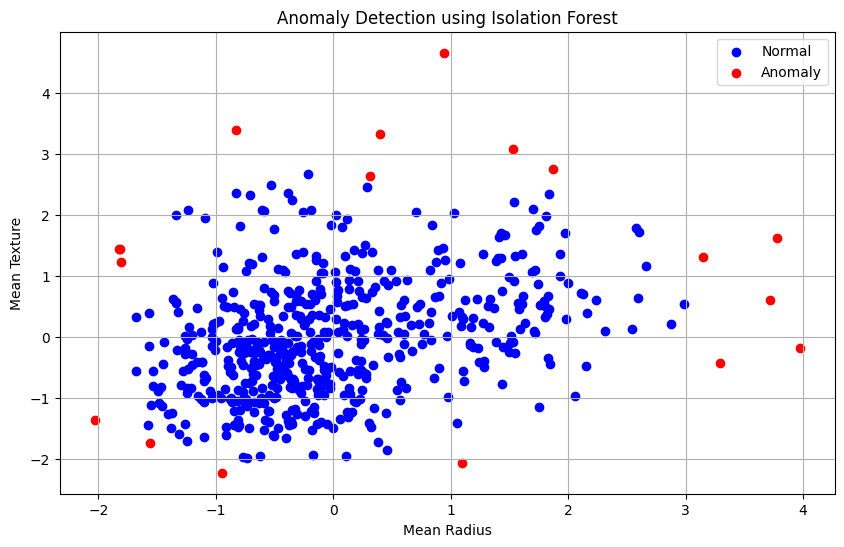

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler

# Replace 'mean radius' and 'mean texture' with your desired features
X_plot = X[['mean radius', 'mean texture']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_plot)

# Fit Isolation Forest
iso = IsolationForest(contamination=0.03, random_state=42)
iso.fit(X_scaled)
anoms = iso.predict(X_scaled)

# Separate normal and anomaly points
X_scaled = np.array(X_scaled)
normal = X_scaled[anoms == 1]
anomaly = X_scaled[anoms == -1]

# Plot
plt.figure(figsize=(10, 6))
plt.scatter(normal[:, 0], normal[:, 1], c='blue', label='Normal')
plt.scatter(anomaly[:, 0], anomaly[:, 1], c='red', label='Anomaly')
plt.title("Anomaly Detection using Isolation Forest")
plt.xlabel("Mean Radius") # Update x-axis label
plt.ylabel("Mean Texture") # Update y-axis label
plt.legend()
plt.grid(True)
plt.show()

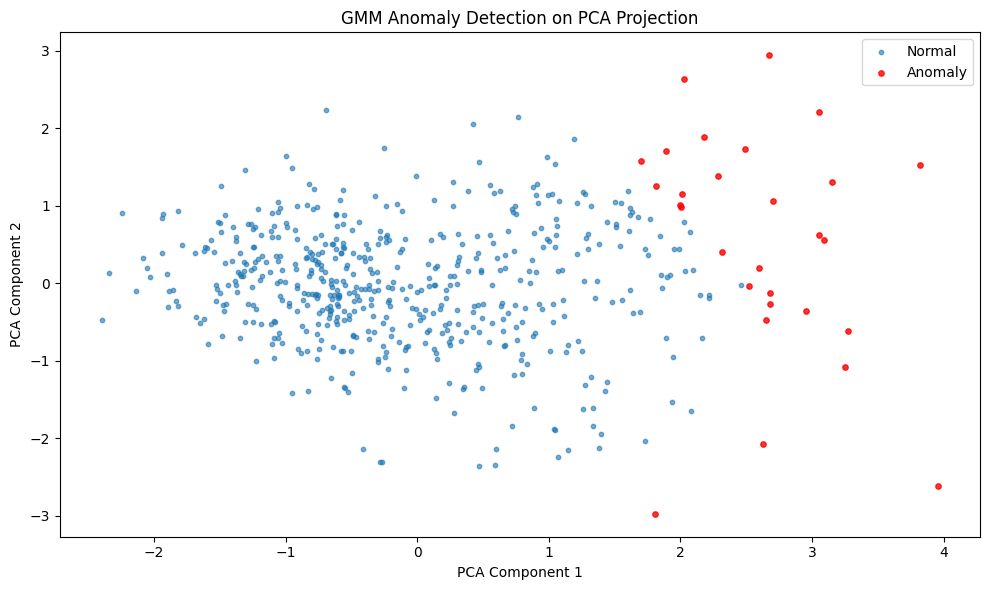

In [ ]:
import pandas as pd
import numpy as np
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Assuming X_scaled is your pre-scaled feature matrix (n_samples × n_features)
# Replace with your actual data
# Example:
# X_scaled = StandardScaler().fit_transform(df.drop(columns=['target_column']))

# 3. PCA projection to 2D for plotting
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_scaled)

# 1. Fit GMM and compute outlier scores
gmm = GaussianMixture(n_components=2, random_state=42)  # Adjust n_components as needed
gmm.fit(X_pca)
probs = gmm.predict_proba(X_pca)
outlier_scores = np.min(probs, axis=1)

# 2. Choose a threshold (e.g. bottom 5% of scores)
threshold = np.percentile(outlier_scores, 5) # Adjust percentile as needed
outliers = outlier_scores < threshold

# 4. Scatter plot with anomalies highlighted
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[~outliers, 0], X_pca[~outliers, 1],
            s=10, label='Normal', alpha=0.6)
plt.scatter(X_pca[outliers, 0], X_pca[outliers, 1],
            color='red', s=15, label='Anomaly', alpha=0.8)
plt.title("GMM Anomaly Detection on PCA Projection")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
# 4. CLUSTERING
kmeans = KMeans(n_clusters=2, random_state=42)
clusters = kmeans.fit_predict(X_scaled)
print("Cluster sizes:", np.bincount(clusters))

Cluster sizes: [210 359]


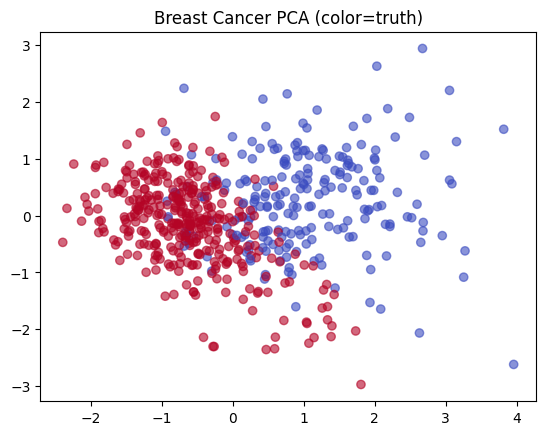

In [ ]:
# 5. DIMENSIONALITY REDUCTION (PCA)
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_scaled)
plt.scatter(X_pca[:,0], X_pca[:,1], c=y, cmap='coolwarm', alpha=0.6)
plt.title("Breast Cancer PCA (color=truth)"); plt.show()



## Unsupervised Learning: Clustering - DBScan and BIRCH.


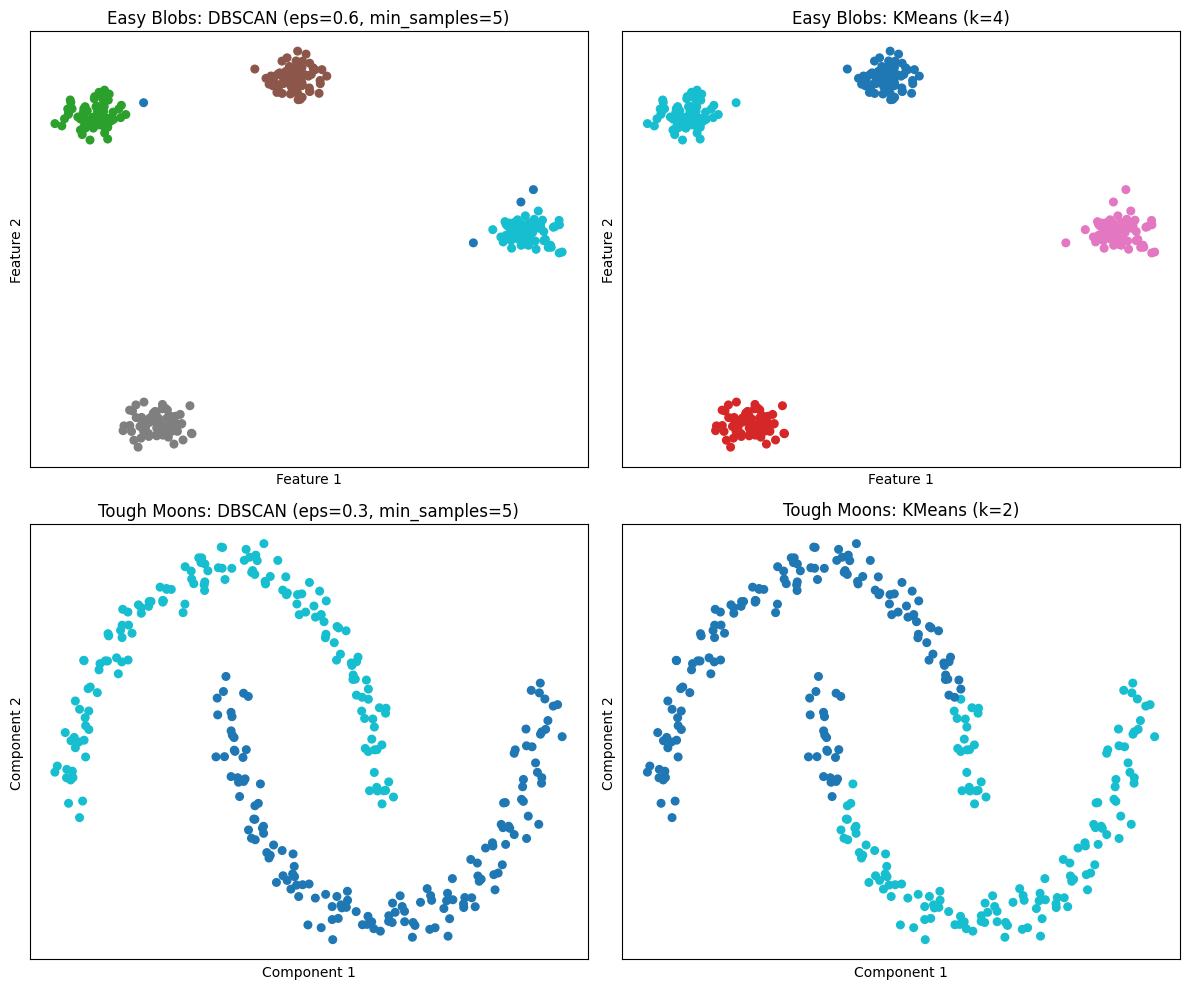

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs, make_moons
from sklearn.cluster import DBSCAN, KMeans
from sklearn.preprocessing import StandardScaler

# 1. Generate synthetic datasets
X_easy, _ = make_blobs(n_samples=300, centers=4, cluster_std=0.5, random_state=42)
X_tough, _ = make_moons(n_samples=300, noise=0.05, random_state=42)
X_tough = StandardScaler().fit_transform(X_tough)

# 2. Run DBSCAN and KMeans
db_easy  = DBSCAN(eps=0.6, min_samples=5).fit_predict(X_easy)
km_easy  = KMeans(n_clusters=4, random_state=42).fit_predict(X_easy)
db_tough = DBSCAN(eps=0.3, min_samples=5).fit_predict(X_tough)
km_tough = KMeans(n_clusters=2, random_state=42).fit_predict(X_tough)

# 3. Plot results in a 2×2 grid
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Easy dataset: DBSCAN
axs[0, 0].scatter(X_easy[:, 0], X_easy[:, 1], c=db_easy, cmap='tab10', s=30)
axs[0, 0].set_title("Easy Blobs: DBSCAN (eps=0.6, min_samples=5)")
axs[0, 0].set_xlabel("Feature 1")
axs[0, 0].set_ylabel("Feature 2")

# Easy dataset: KMeans
axs[0, 1].scatter(X_easy[:, 0], X_easy[:, 1], c=km_easy, cmap='tab10', s=30)
axs[0, 1].set_title("Easy Blobs: KMeans (k=4)")
axs[0, 1].set_xlabel("Feature 1")
axs[0, 1].set_ylabel("Feature 2")

# Tough dataset: DBSCAN
axs[1, 0].scatter(X_tough[:, 0], X_tough[:, 1], c=db_tough, cmap='tab10', s=30)
axs[1, 0].set_title("Tough Moons: DBSCAN (eps=0.3, min_samples=5)")
axs[1, 0].set_xlabel("Component 1")
axs[1, 0].set_ylabel("Component 2")

# Tough dataset: KMeans
axs[1, 1].scatter(X_tough[:, 0], X_tough[:, 1], c=km_tough, cmap='tab10', s=30)
axs[1, 1].set_title("Tough Moons: KMeans (k=2)")
axs[1, 1].set_xlabel("Component 1")
axs[1, 1].set_ylabel("Component 2")

# Remove tick marks for clarity
for ax in axs.flat:
    ax.set_xticks([])
    ax.set_yticks([])

plt.tight_layout()
plt.show()


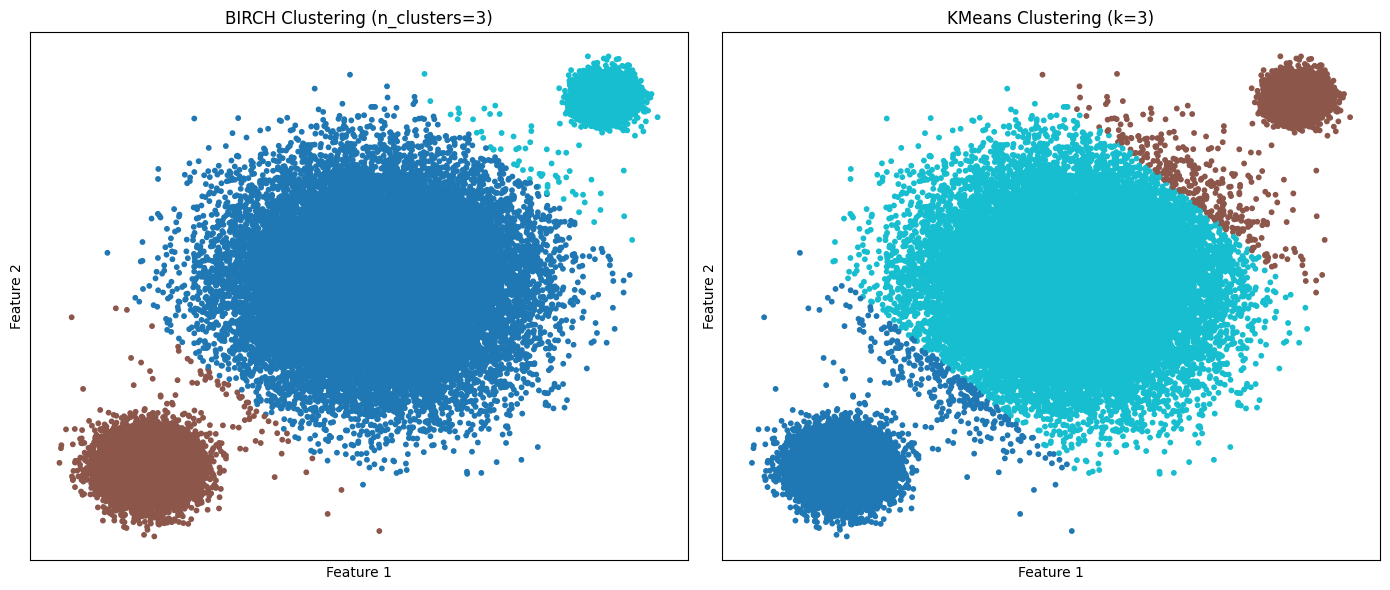

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import Birch, KMeans
from sklearn.preprocessing import StandardScaler

# 1. Generate synthetic dataset with varying cluster densities
X, _ = make_blobs(
    n_samples=[10000, 30000, 5000],        # varying sizes
    centers=[(-5, -5), (0, 0), (5, 5)], # three cluster centers
    cluster_std=[0.5, 1.5, 0.3],        # varying spreads
    random_state=42
)
X = StandardScaler().fit_transform(X)
# ==========================================================================================
# 2. Apply BIRCH and KMeans
birch_labels  = Birch(n_clusters=3).fit_predict(X)
kmeans_labels = KMeans(n_clusters=3, random_state=42).fit_predict(X)
# ==========================================================================================
# 3. Plot comparison
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

axes[0].scatter(X[:, 0], X[:, 1], c=birch_labels, cmap='tab10', s=10)
axes[0].set_title("BIRCH Clustering (n_clusters=3)")
axes[0].set_xlabel("Feature 1"); axes[0].set_ylabel("Feature 2")

axes[1].scatter(X[:, 0], X[:, 1], c=kmeans_labels, cmap='tab10', s=10)
axes[1].set_title("KMeans Clustering (k=3)")
axes[1].set_xlabel("Feature 1"); axes[1].set_ylabel("Feature 2")

for ax in axes:
    ax.set_xticks([]); ax.set_yticks([])

plt.tight_layout()
plt.show()


Anomaly Detection - Density Estimation

- GMM Density Estimation
- Isolation Forest
- Z-Score (>3σ)

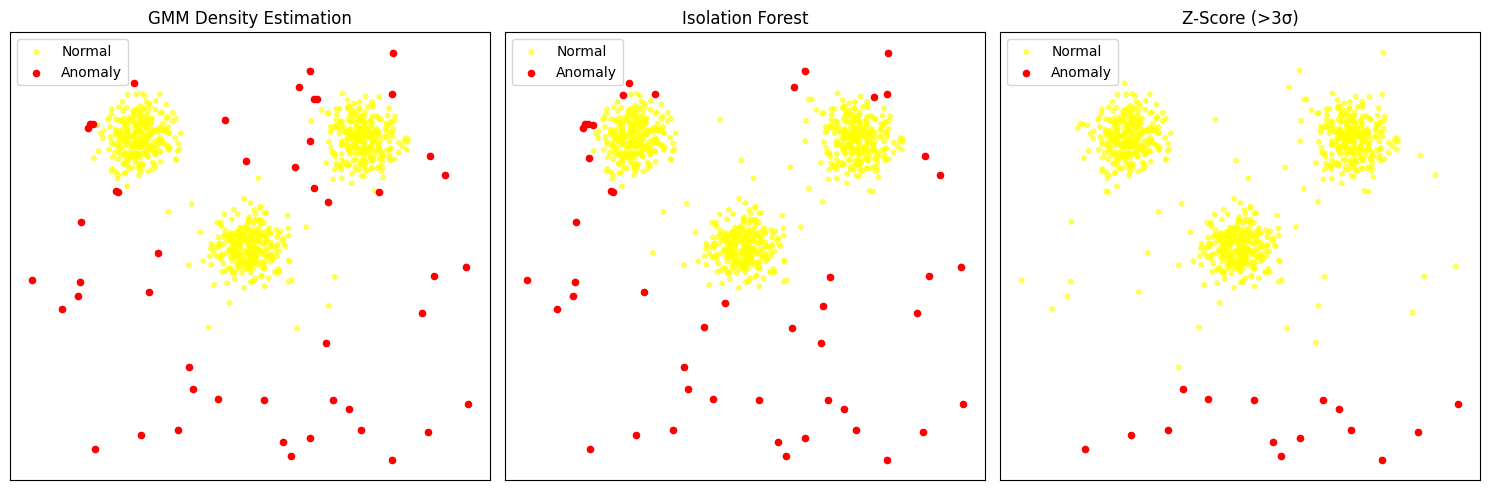

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
from scipy.stats import zscore

# 1. Generate synthetic 2D data: mixture of Gaussians + uniform anomalies
rng = np.random.RandomState(42)
X1 = rng.normal(loc=[0, 0], scale=0.5, size=(300, 2))
X2 = rng.normal(loc=[3, 3], scale=0.5, size=(300, 2))
X3 = rng.normal(loc=[-3, 3], scale=0.5, size=(300, 2))
X = np.vstack([X1, X2, X3])
anom = rng.uniform(low=-6, high=6, size=(50, 2))
X_all = np.vstack([X, anom])

# 2. Scale data
X_scaled = StandardScaler().fit_transform(X_all)

# 3. GMM density estimation
gmm = GaussianMixture(n_components=3, random_state=42)
gmm.fit(X_scaled)
densities = np.exp(gmm.score_samples(X_scaled))
gmm_thresh = np.percentile(densities, 5)
gmm_outliers = densities < gmm_thresh

# 4. Isolation Forest
iforest = IsolationForest(contamination=0.05, random_state=42)
if_outliers = iforest.fit_predict(X_scaled) == -1

# 5. Z-score method (threshold = 3 std dev)
zs = np.abs(zscore(X_scaled))
z_outliers = (zs > 3).any(axis=1)

# 6. Plot comparison (3 subplots)
methods = [
    (gmm_outliers, "GMM Density Estimation"),
    (if_outliers,  "Isolation Forest"),
    (z_outliers,   "Z-Score (>3σ)")
]

fig, axes = plt.subplots(1, 3, figsize=(15, 5))
for ax, (mask, title) in zip(axes, methods):
    ax.scatter(X_all[:, 0], X_all[:, 1], c=~mask, cmap='spring', s=10, label='Normal', alpha=0.6)
    ax.scatter(X_all[mask, 0], X_all[mask, 1], c='red', s=20, label='Anomaly')
    ax.set_title(title)
    ax.legend()
    ax.set_xticks([])
    ax.set_yticks([])

plt.tight_layout()
plt.show()


# Dimension Reduction with Principal Components Analysis, Kernel Principal Components Analysis.

### 1. PCA on Linearly Separable Data

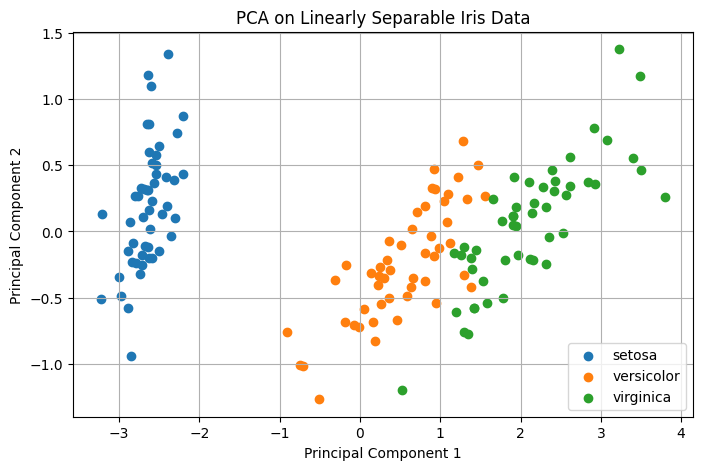

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA

# Load Iris Dataset
data = load_iris()
X = data.data
y = data.target

# Apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Plot
plt.figure(figsize=(8, 5))
for label in np.unique(y):
    plt.scatter(X_pca[y == label, 0], X_pca[y == label, 1], label=data.target_names[label])
plt.title("PCA on Linearly Separable Iris Data")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.grid(True)
plt.show()


### Kernel PCA on Nonlinear Data (e.g., Moons)

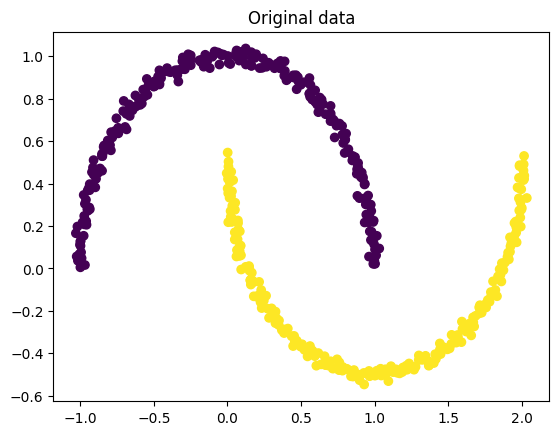

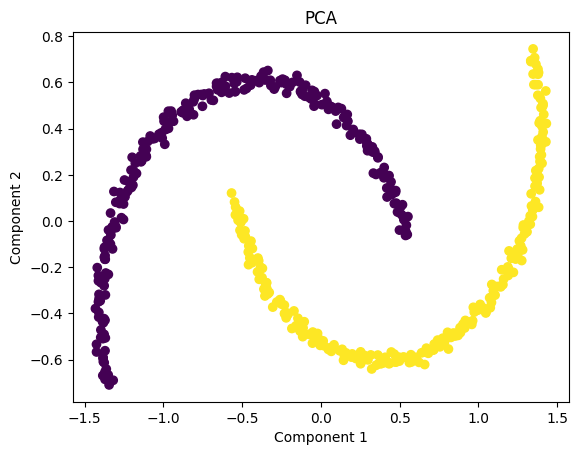

In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=500, noise=0.02, random_state=417)
plt.title("Original data")
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.title("PCA")
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y)
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.show()


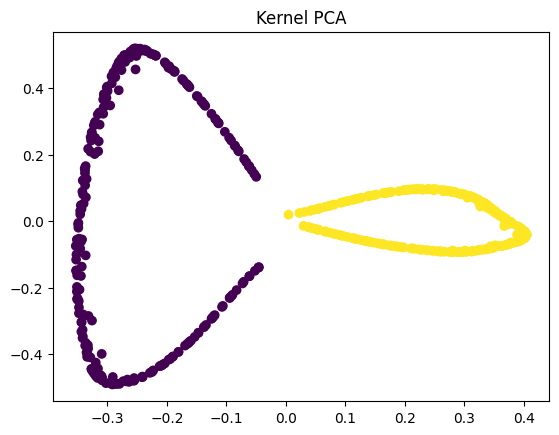

In [ ]:
from sklearn.decomposition import KernelPCA
kpca = KernelPCA(kernel='rbf', gamma=15)
X_kpca = kpca.fit_transform(X)

plt.title("Kernel PCA")
plt.scatter(X_kpca[:, 0], X_kpca[:, 1], c=y)
plt.show()

# Solving Classification Problems - Logistic Regression, SVM

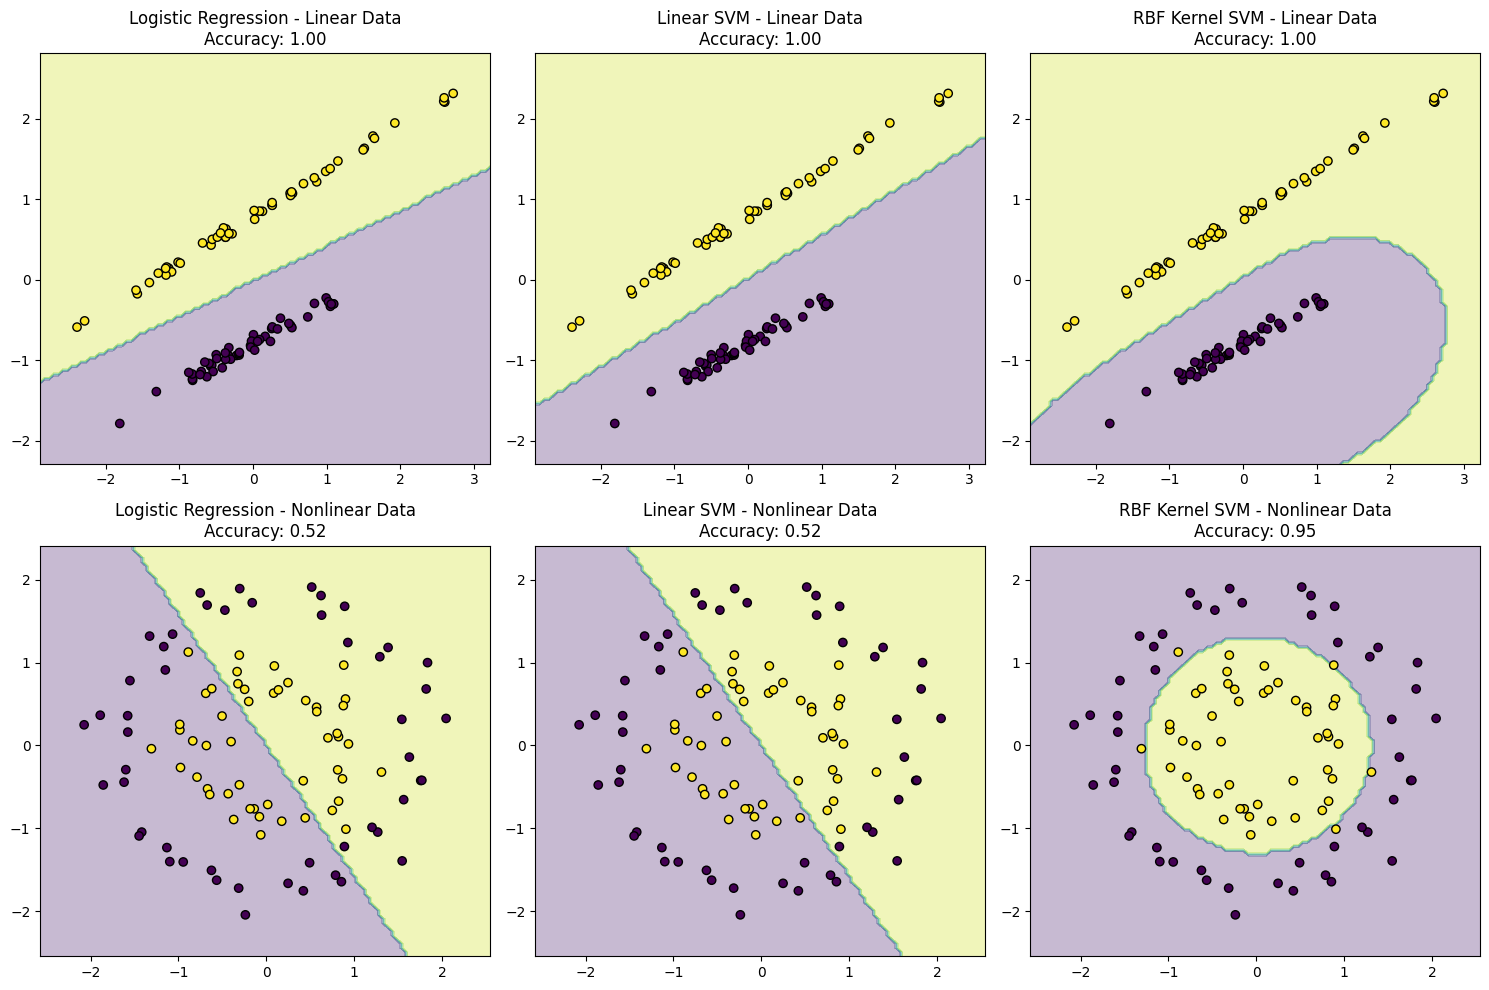

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification, make_circles
from sklearn.svm import SVC, LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score

# Generate datasets
# 1. Linearly separable data
X_linear, y_linear = make_classification(
    n_samples=100, n_features=2, n_redundant=0, n_clusters_per_class=1, random_state=42
)

# 2. Nonlinear (logistic/circular) data
X_nonlinear, y_nonlinear = make_circles(n_samples=100, noise=0.1, factor=0.5, random_state=42)

# Scale data (critical for SVM)
scaler = StandardScaler()
X_linear = scaler.fit_transform(X_linear)
X_nonlinear = scaler.fit_transform(X_nonlinear)

# Initialize models
models = {
    "Logistic Regression": LogisticRegression(),
    "Linear SVM": LinearSVC(C=1.0),
    "RBF Kernel SVM": SVC(kernel="rbf", gamma="scale"),
}

# Evaluate on both datasets
datasets = {"Linear Data": (X_linear, y_linear), "Nonlinear Data": (X_nonlinear, y_nonlinear)}

# Plot decision boundaries
def plot_decision_boundary(model, X, y, ax, title):
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    ax.contourf(xx, yy, Z, alpha=0.3)
    ax.scatter(X[:, 0], X[:, 1], c=y, edgecolors="k")
    ax.set_title(f"{title}\nAccuracy: {accuracy_score(y, model.predict(X)):.2f}")

# Compare models
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
for i, (dataset_name, (X, y)) in enumerate(datasets.items()):
    for j, (model_name, model) in enumerate(models.items()):
        model = make_pipeline(StandardScaler(), model)  # Ensure scaling
        model.fit(X, y)
        plot_decision_boundary(model, X, y, axes[i, j], f"{model_name} - {dataset_name}")

plt.tight_layout()
plt.show()

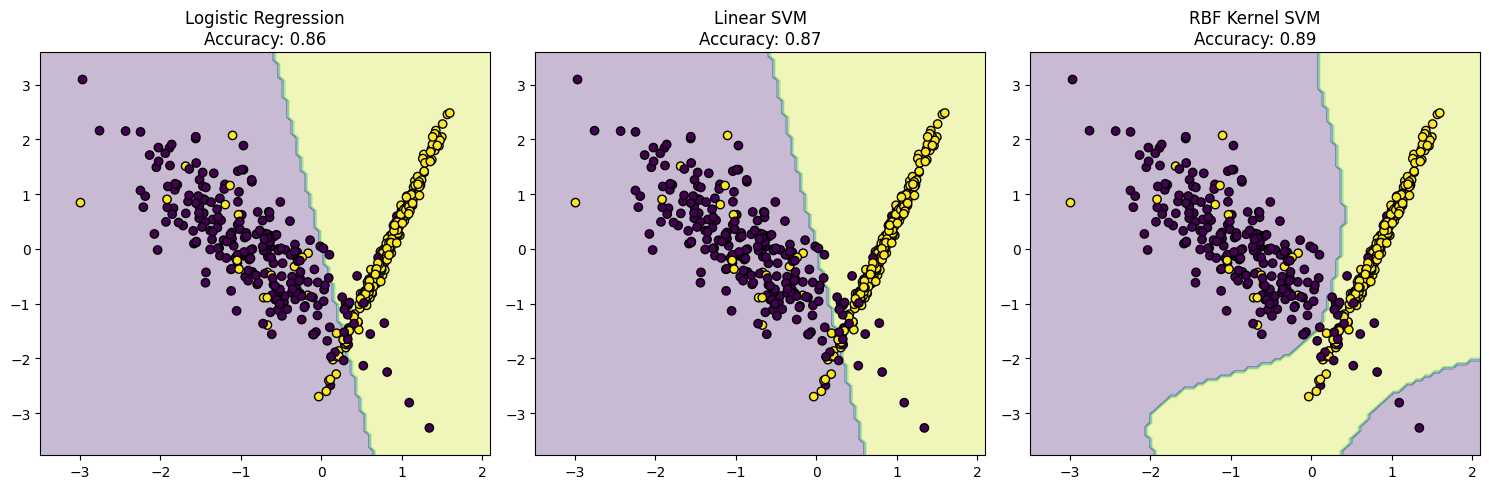

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.svm import SVC, LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Generate a deceptive linear dataset where SVM shines
X, y = make_classification(
    n_samples=500,
    n_features=2,
    n_redundant=0,
    n_clusters_per_class=1,
    class_sep=1.5,  # Clear separation but with noise
    flip_y=0.15,    # Add label noise
    random_state=42
)

# Add a few critical misclassified points to break linear models
X = np.vstack([X, np.array([[1.5, -0.5], [2.0, -1.0]])])
y = np.append(y, [0, 0])

# Scale data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Linear SVM": LinearSVC(C=1.0, max_iter=10000),
    "RBF Kernel SVM": SVC(kernel='rbf', C=1.0, gamma='scale')
}

# Plot decision boundaries
plt.figure(figsize=(15, 5))
for i, (name, model) in enumerate(models.items(), 1):
    model.fit(X_scaled, y)
    acc = accuracy_score(y, model.predict(X_scaled))

    # Create decision boundary plot
    plt.subplot(1, 3, i)
    x_min, x_max = X_scaled[:, 0].min() - 0.5, X_scaled[:, 0].max() + 0.5
    y_min, y_max = X_scaled[:, 1].min() - 0.5, X_scaled[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y, edgecolors='k')
    plt.title(f"{name}\nAccuracy: {acc:.2f}")

plt.tight_layout()
plt.show()

# Decision Tree.


In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Dataset
data = {
    'Outlook': ['Sunny', 'Sunny', 'Overcast', 'Rainy', 'Rainy', 'Rainy', 'Overcast'],
    'Temperature': ['Hot', 'Hot', 'Mild', 'Cool', 'Cool', 'Mild', 'Mild'],
    'Humidity': ['High', 'High', 'High', 'High', 'Normal', 'Normal', 'Normal'],
    'Wind': ['Weak', 'Strong', 'Weak', 'Weak', 'Weak', 'Strong', 'Strong'],
    'Play': ['No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes']
}
df = pd.DataFrame(data)
df


,Outlook,Temperature,Humidity,Wind,Play
0,Sunny,Hot,High,Weak,No
1,Sunny,Hot,High,Strong,No
2,Overcast,Mild,High,Weak,Yes
3,Rainy,Cool,High,Weak,Yes
4,Rainy,Cool,Normal,Weak,Yes
5,Rainy,Mild,Normal,Strong,No
6,Overcast,Mild,Normal,Strong,Yes


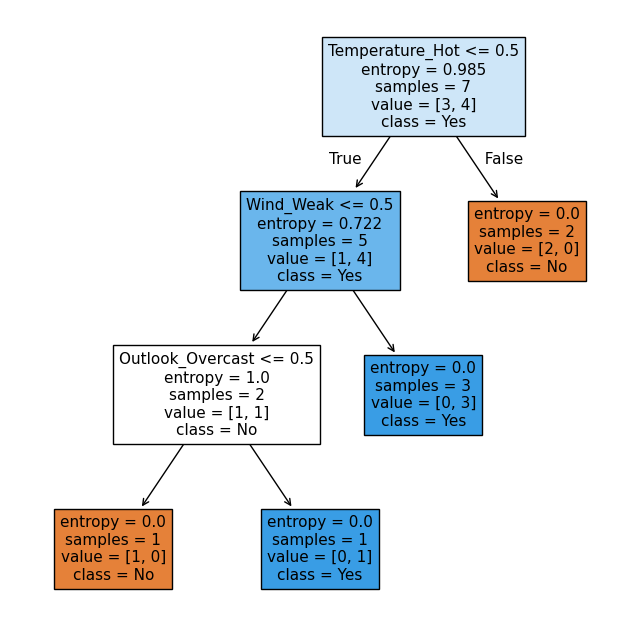

In [ ]:
# Convert categorical to numerical
X = pd.get_dummies(df.drop('Play', axis=1))
y = df['Play']

# Train and visualize
clf = DecisionTreeClassifier(criterion='entropy', max_depth=5)
clf.fit(X, y)

plt.figure(figsize=(8,8))
plot_tree(clf, feature_names=X.columns, class_names=['No', 'Yes'], filled=True)
plt.show()

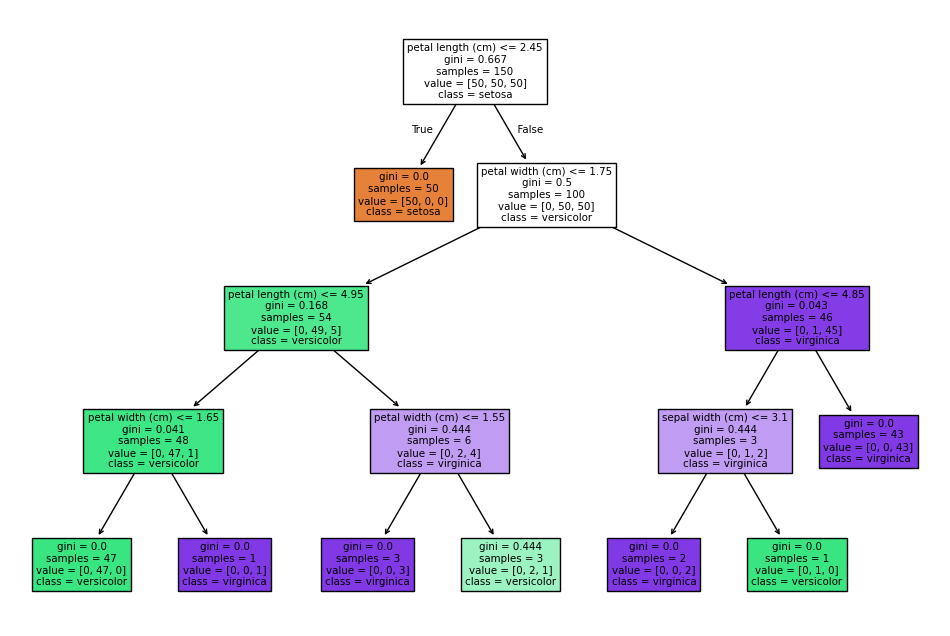

Feature importances:
sepal length (cm): 0.00
sepal width (cm): 0.01
petal length (cm): 0.56
petal width (cm): 0.43


In [ ]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Load data
iris = load_iris()
X, y = iris.data, iris.target

# Train and visualize
clf = DecisionTreeClassifier(max_depth=4, random_state=42)
clf.fit(X, y)

plt.figure(figsize=(12,8))
plot_tree(clf,
          feature_names=iris.feature_names,
          class_names=iris.target_names,
          filled=True)
plt.show()

# Feature importance
print("Feature importances:")
for name, importance in zip(iris.feature_names, clf.feature_importances_):
    print(f"{name}: {importance:.2f}")

Best params: {'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 2}
R2 score: 0.96


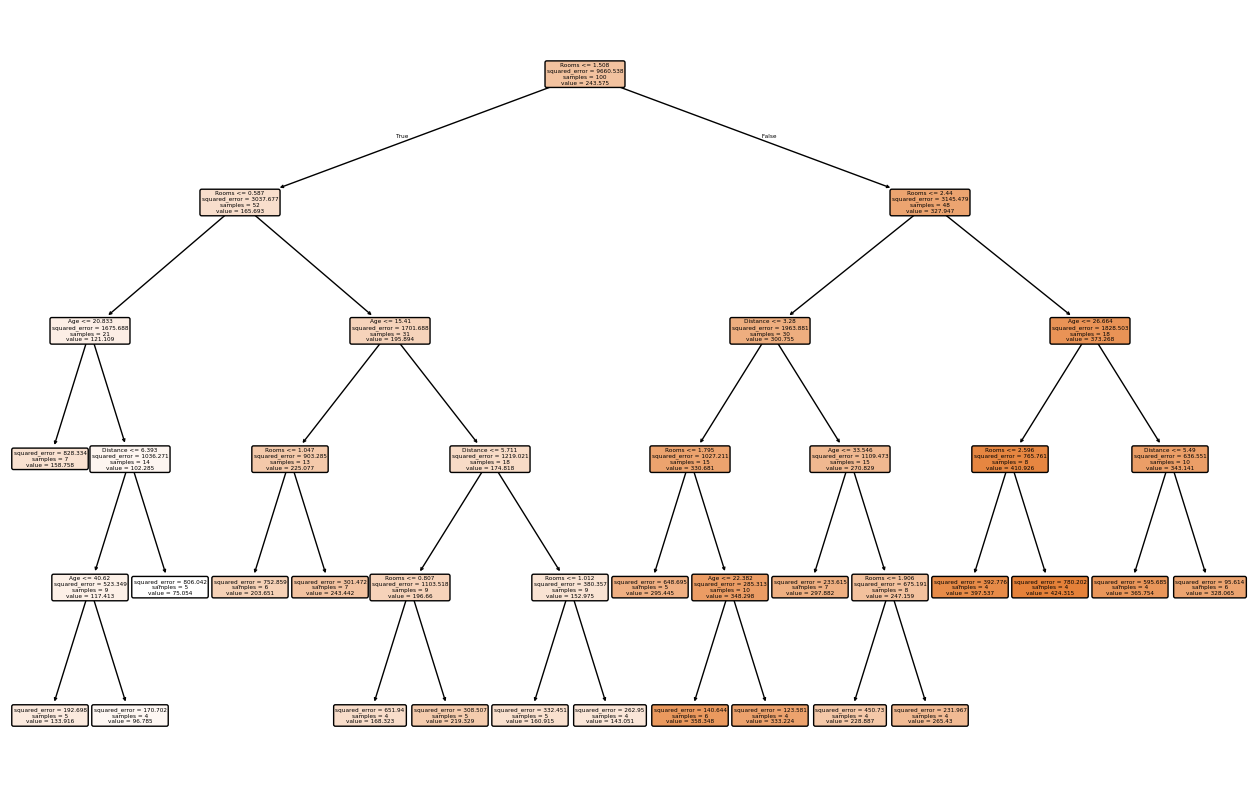


Feature importances:
Rooms: 0.88
Age: 0.07
Distance: 0.05


In [ ]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt

# Synthetic dataset
np.random.seed(42)
X = np.random.rand(100, 3) * [3, 50, 10]  # [rooms, age, distance]
y = 200 + X[:,0]*100 - X[:,1]*2 - X[:,2]*10 + np.random.normal(0, 20, 100)

# Hyperparameter tuning
params = {
    'max_depth': [2, 3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

model = GridSearchCV(DecisionTreeRegressor(), params, cv=5)
model.fit(X, y)

# Best model
best_tree = model.best_estimator_
print(f"Best params: {model.best_params_}")
print(f"R2 score: {best_tree.score(X, y):.2f}")

# Visualize the best tree
plt.figure(figsize=(16,10))
plot_tree(best_tree,
          feature_names=['Rooms', 'Age', 'Distance'],
          filled=True,
          rounded=True)
plt.show()

# Feature importance
print("\nFeature importances:")
for name, imp in zip(['Rooms', 'Age', 'Distance'], best_tree.feature_importances_):
    print(f"{name}: {imp:.2f}")

In [ ]:
# Load data
titanic = pd.read_csv("https://raw.githubusercontent.com/hirdeshiitkgp/Data/refs/heads/main/Titanic.csv")
X = titanic[['Pclass', 'Sex', 'Age', 'Fare']]
y = titanic['Survived']

# Preprocess
X['Sex'] = X['Sex'].map({'male':0, 'female':1})
X['Age'].fillna(X['Age'].median(), inplace=True)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Train model
model = DecisionTreeClassifier(max_depth=3)
model.fit(X_train, y_train)

# Evaluate
print("Accuracy:", model.score(X_train, y_train))
print("Accuracy:", model.score(X_test, y_test))

Accuracy: 0.8424657534246576
Accuracy: 0.7567567567567568


<ipython-input-157-8a5c63e0850e>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Sex'] = X['Sex'].map({'male':0, 'female':1})
<ipython-input-157-8a5c63e0850e>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X['Age'].fillna(X['Age'].median(), inplace=True)
<ipython-input-157-8a5c63e0

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Load and preprocess data
df = pd.read_csv("https://raw.githubusercontent.com/hirdeshiitkgp/Data/refs/heads/main/salaries.csv")
print(df)
inputs = pd.get_dummies(df.drop('salary_more_then_100k', axis=1))
target = df['salary_more_then_100k']
print(inputs)
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(inputs, target, test_size=0.2)

# Train Random Forest
rf = RandomForestClassifier(n_estimators=100, max_depth=3, random_state=42)
rf.fit(X_train, y_train)

# Evaluate
print(f"Train Accuracy: {rf.score(X_train, y_train):.2f}")
print(f"Test Accuracy: {rf.score(X_test, y_test):.2f}")

# Feature Importance
pd.DataFrame({
    'Feature': inputs.columns,
    'Importance': rf.feature_importances_
}).sort_values('Importance', ascending=False)

       company                  job     degree  salary_more_then_100k
0       google      sales executive  bachelors                      0
1       google      sales executive    masters                      0
2       google     business manager  bachelors                      1
3       google     business manager    masters                      1
4       google  computer programmer  bachelors                      0
5       google  computer programmer    masters                      1
6   abc pharma      sales executive    masters                      0
7   abc pharma  computer programmer  bachelors                      0
8   abc pharma     business manager  bachelors                      0
9   abc pharma     business manager    masters                      1
10    facebook      sales executive  bachelors                      1
11    facebook      sales executive    masters                      1
12    facebook     business manager  bachelors                      1
13    facebook     b

,Feature,Importance
1,company_facebook,0.250033
3,job_business manager,0.164393
2,company_google,0.146368
5,job_sales executive,0.133105
7,degree_masters,0.098564
4,job_computer programmer,0.080254
6,degree_bachelors,0.077565
0,company_abc pharma,0.049717


Accuracy: 0.80


<ipython-input-160-62baca3b0486>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Sex'] = LabelEncoder().fit_transform(X['Sex'])
<ipython-input-160-62baca3b0486>:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X['Age'].fillna(X['Age'].median(), inplace=True)
<ipython-input-160-62ba

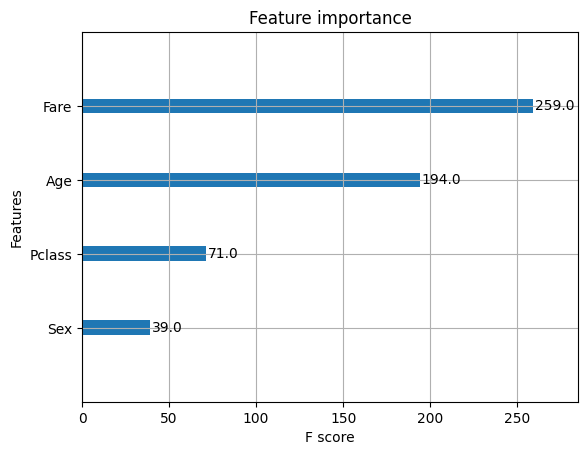

In [ ]:
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder

# Load data
titanic = pd.read_csv("https://raw.githubusercontent.com/hirdeshiitkgp/Data/refs/heads/main/titanic.csv")
X = titanic[['Pclass', 'Sex', 'Age', 'Fare']]
y = titanic['Survived']

# Preprocess
X['Sex'] = LabelEncoder().fit_transform(X['Sex'])
X['Age'].fillna(X['Age'].median(), inplace=True)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Train XGBoost
xgb_clf = xgb.XGBClassifier(
    n_estimators=100,
    max_depth=3,
    learning_rate=0.1,
    use_label_encoder=False,
    eval_metric='logloss'
)
xgb_clf.fit(X_train, y_train)

# Evaluate
print(f"Accuracy: {xgb_clf.score(X_test, y_test):.2f}")

# Feature Importance
xgb.plot_importance(xgb_clf)
plt.show()

#Model Deployment:
### Step 1: Train & Save the Model




In [ ]:
# train_model.py
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
import joblib

# Sample data: Predict salary >100k based on job features
data = {
    'company': ['google', 'facebook', 'google', 'abc pharma'],
    'job': ['manager', 'engineer', 'engineer', 'manager'],
    'degree': ['masters', 'bachelors', 'masters', 'bachelors'],
    'salary_>100k': [1, 1, 0, 0]
}
df = pd.DataFrame(data)

# Preprocess
X = pd.get_dummies(df.drop('salary_>100k', axis=1))
y = df['salary_>100k']

# Train model
model = RandomForestClassifier()
model.fit(X, y)

# Save model and preprocessing mapping
joblib.dump(model, 'model.pkl')
print("Model saved!")

Model saved!
